# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [53]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [54]:
def max_element(arr):
    zero_idx = np.where(arr == 0)[0]
    # исключаем нули, стоящие в конце
    zero_idx = zero_idx[zero_idx < len(arr) - 1]
    
    if zero_idx.size == 0:
        return None
    
    return arr[zero_idx + 1].max()

In [55]:
# ПРОВЕРКА
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_element(x))  # выведет 5

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [56]:
def nearest_value(X, v):
    return X.flat[np.abs(X - v).argmin()]

In [57]:
# ПРОВЕРКА
X = np.arange(10).reshape(2, 5)
print(nearest_value(X, 3.6))  # выведет 4

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [58]:
def scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    
    std_safe = np.where(std == 0, 1, std)
    return (X - mean) / std_safe

In [59]:
# ПРОВЕРКА
X = np.random.randint(0, 10, size=(5, 3))
print(scale(X))

[[-0.21997067 -0.62360956 -0.20412415]
 [-1.31982404 -0.62360956 -0.20412415]
 [ 1.61311827  0.71269665 -1.22474487]
 [ 0.5132649  -1.06904497  1.83711731]
 [-0.58658846  1.60356745 -0.20412415]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [60]:
def get_stats(X):
    return {
        "determinant": np.linalg.det(X),
        "trace": np.trace(X),
        "min": X.min(),
        "max": X.max(),
        "frobenius_norm": np.linalg.norm(X, ord='fro'),
        "eigenvalues": np.linalg.eigvals(X),
        "inverse": np.linalg.inv(X)
    }

In [61]:
# ТЕСТ
X = np.random.normal(10, 1, size=(5, 5))
stats = get_stats(X)
stats

{'determinant': 14.739301274288572,
 'trace': 48.04791474541689,
 'min': 8.296952757467679,
 'max': 11.225161833464444,
 'frobenius_norm': 48.480562921831925,
 'eigenvalues': array([48.32750756, -1.91610006,  1.52350977,  0.38462786, -0.27163038]),
 'inverse': array([[-0.03461711,  1.8045619 , -0.47067469, -1.94321215,  0.58968247],
        [ 0.67685589,  0.47588556, -0.72146642,  0.30384637, -0.73307421],
        [-0.65362229, -2.32098605,  1.63000564,  2.04846126, -0.57082015],
        [ 0.22798782,  1.47105149, -0.4882375 , -2.57250486,  1.3283288 ],
        [-0.27800479, -1.44127178,  0.18971643,  2.0137615 , -0.42514904]])}

In [62]:
# Проверка обратной
X @ stats['inverse'] # единичная диагональ и ооочень маленькие поддиагональные погрешности — такие вот нули

array([[ 1.00000000e+00, -2.18058550e-15, -3.51647423e-16,
        -6.03572348e-16, -4.71722103e-16],
       [-7.53050406e-17,  1.00000000e+00, -4.35103087e-16,
        -1.06931359e-15, -3.52923143e-16],
       [-3.42263211e-16,  1.27586603e-15,  1.00000000e+00,
         1.24122288e-15,  4.21864506e-16],
       [-1.07176596e-16,  3.05724209e-15, -2.30249022e-16,
         1.00000000e+00,  6.87416973e-16],
       [-5.26830224e-17,  2.26891103e-15, -1.42193364e-16,
        -1.02678783e-15,  1.00000000e+00]])

**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [63]:
max_values = []

for exp_num in range(100):
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)
    C = A @ B
    max_values.append(C.max())

max_values = np.array(max_values)

mean_max = max_values.mean()
quantile_95 = np.quantile(max_values, 0.95)

mean_max, quantile_95

(8.207922618020719, 11.481620065379822)

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [64]:
import pandas as pd
%matplotlib inline

df = pd.read_csv("2008.csv")

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [65]:
df_cancelled = df[df["Cancelled"] == 1]

df_cancelled["CancellationCode"].value_counts().idxmax()

'A'

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [66]:
df["Distance"].agg(["mean", "min", "max"])

mean     724.508257
min       31.000000
max     4962.000000
Name: Distance, dtype: float64

**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [67]:
min_dist = df["Distance"].min()
min_dist

31

In [68]:
suspicious = df[df["Distance"] == min_dist][
    ["Year", "Month", "DayofMonth", "UniqueCarrier", "FlightNum", "Origin", "Dest", "Distance"]
]

suspicious

,Year,Month,DayofMonth,UniqueCarrier,FlightNum,Origin,Dest,Distance
1116,2008,12,30,AS,65,WRG,PSG,31
6958,2008,12,26,AS,65,WRG,PSG,31
17349,2008,8,18,AS,64,PSG,WRG,31
27534,2008,3,11,AS,64,PSG,WRG,31
46082,2008,8,9,AS,65,WRG,PSG,31
48112,2008,2,28,AS,64,PSG,WRG,31


**Вывод**: Это два самолёта, ходящие в мини-рейсы между двумя близко расположенными городами в Аляске.

Wrangell (WRG) и Petersburg (PSG) — это два соседних города в юго-восточной части Аляски, соединенные очень коротким прямым авиасообщением.
Перелёты между ними занимают 14-30 минут.

In [69]:
same_flights = df.merge(
    suspicious[["UniqueCarrier", "FlightNum", "Origin", "Dest"]].drop_duplicates(),
    on=["UniqueCarrier", "FlightNum", "Origin", "Dest"],
    how="inner"
)

same_flights["Distance"].value_counts()


31    6
Name: Distance, dtype: int64

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [70]:
top_airport = df["Origin"].value_counts().idxmax()
top_airport


'ATL'

In [71]:
df[df["Origin"] == top_airport][["Origin"]].head()


,Origin
13,ATL
21,ATL
54,ATL
76,ATL
78,ATL


**Вывод**: больше всего вылетов из Международного аэропорта Хартсфилд-Джексон в Атланте (ATL) — крупнейшего аэропорта США и мира по пассажиропотоку, он обслуживает более 100 миллионов пассажиров ежегодно, что делает его одним из самых загруженных в мире по числу рейсов.

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [72]:
mean_airtime = (
    df.groupby("Origin")["AirTime"]
      .mean()
      .sort_values(ascending=False)
)

mean_airtime.head(1)


Origin
SJU    205.2
Name: AirTime, dtype: float64

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [73]:
dep_stats = (
    df.groupby("Origin")
      .filter(lambda x: len(x) >= 1000)
      .groupby("Origin")
      .apply(lambda x: (x["DepDelay"] > 0).mean())
)

dep_stats.sort_values(ascending=False).head(1)


Origin
EWR    0.511159
dtype: float64

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [74]:
has_na = df.isna().any().any()
has_na # Да, пропущенные значения есть

True

In [75]:
total_na = df.isna().sum().sum()
total_na # Всего пропущенных эл-тов

355215

In [76]:
rows_with_na = df.isna().any(axis=1).sum()
rows_with_na # Объектов, имеющих хотя бы один пропуск

70000

In [77]:
cols_with_na = df.isna().any(axis=0).sum()
cols_with_na # Признаков, имеющих хотя бы одно пропущенное значение

16

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [78]:
target_na = df["DepDelay"].isna().sum()
target_na # Пропуски. Да, они есть.

1399

In [79]:
missing_target = df[df["DepDelay"].isna()]
missing_target.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Это рейсы, которые не вылетели, поэтому DepTime, ArrTime, DepDelay и многие другие для них не имеют смысла.

Исключаем 

In [80]:
# Удаляем объекты с NaN в DepDelay и с DepDelay == 0
df_clean = df.dropna(subset=["DepDelay"])
df_clean = df_clean[df_clean["DepDelay"] != 0]

# Исключаем бесполезные признаки
drop_cols = ["DepDelay", "Cancelled", "CancellationCode", "Diverted"]

# Матрица признаков
X = df_clean.drop(columns=drop_cols)

# Целевая переменная
y = df_clean["DepDelay"]

# Проверим размеры
X.shape, y.shape


((63404, 25), (63404,))

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [81]:
time_cols = ["DepTime", "CRSDepTime", "CRSArrTime"] ## ArrTime я исключил вообще, потому что потом его дропаем.

for col in time_cols:
    X[f"{col}_Hour"] = X[col] // 100
    X[f"{col}_Minute"] = X[col] % 100

X = X.drop(columns=time_cols)

In [82]:
# ПРОВЕРКА
X.filter(like="DepTime").head()


,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute
0,21.0,11.0,20,55
1,14.0,26.0,14,10
2,11.0,43.0,11,45
3,11.0,41.0,11,44
4,8.0,15.0,8,20


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [83]:
leakage_cols = [
    "CarrierDelay", "WeatherDelay", "NASDelay",
    "SecurityDelay", "LateAircraftDelay",
    "ArrDelay", "ArrTime", "TaxiOut",
    "AirTime", "ActualElapsedTime",
    "TailNum", "Year"
]

X = X.drop(columns=leakage_cols)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

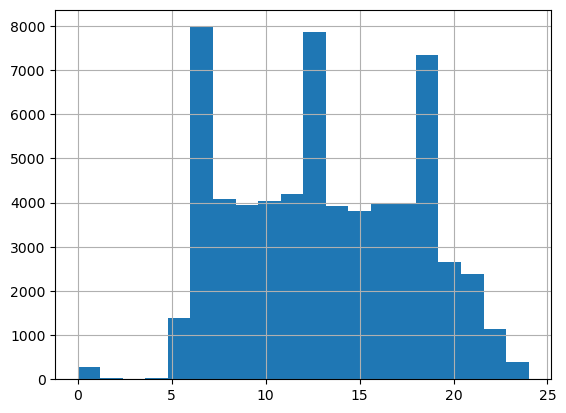

In [84]:
X['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

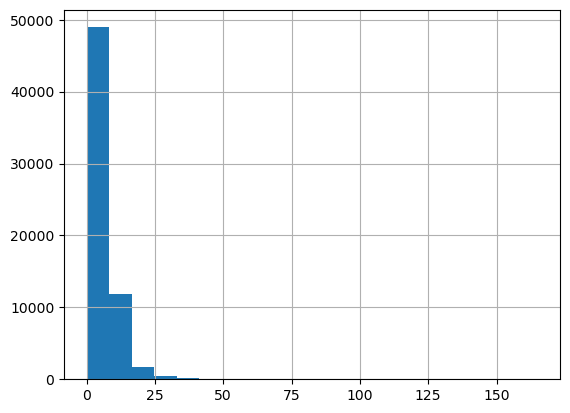

In [85]:
X['TaxiIn'].hist(bins=20)

<AxesSubplot:>

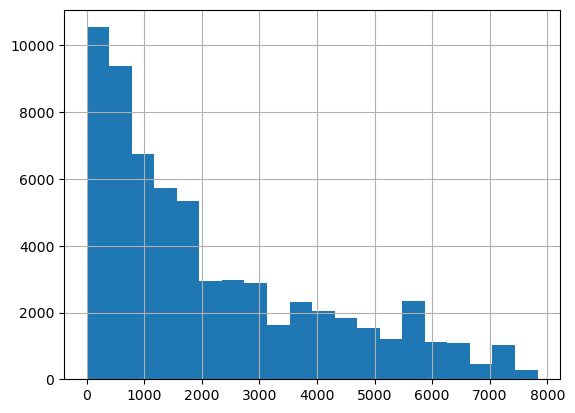

In [86]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

*Во-первых*, вещественные признаки имеют разные единицы измерения и поэтому их числовые значения могут отличаться во много раз, вплоть до несоизмеримых пропорций. Из-за этого одни будут влиять на обучение модели существенно больше, чем другие. Лучше "натянуть" диапазон значений каждого признака на одинаковый отрезок значений, скажем, от 0 до 1. Это и есть масштабирование.

*Во-вторых*, некоторые признаки категориальные и вообще не могут быть сравнены с вещественными без предварительных преобразований, поэтому их надо перевести в числовой вид.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [87]:
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler

def transform_data(data: DataFrame):
    # сперва определим, где вещественные, а где категориальные признаки
    numcols = data.select_dtypes(include=[np.number]).columns
    catcols = data.select_dtypes(include=['object', 'category']).columns

    # в целях наглядности
    print('Numerical: ', numcols)
    print('Categorical: ', catcols)

    data_transformed = data.copy()

    # заменим пропущенные значения
    data_transformed[numcols] = data_transformed[numcols].fillna(0)
    data_transformed[catcols] = data_transformed[catcols].fillna('nan')

    # масштабируем вещественные признаки
    data_transformed[numcols] = StandardScaler().fit_transform(data_transformed[numcols])

    return pd.get_dummies(data_transformed, columns=catcols)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [88]:
X = transform_data(X)

X

Numerical:  Index(['Month', 'DayofMonth', 'DayOfWeek', 'FlightNum', 'CRSElapsedTime',
       'Distance', 'TaxiIn', 'DepTime_Hour', 'DepTime_Minute',
       'CRSDepTime_Hour', 'CRSDepTime_Minute', 'CRSArrTime_Hour',
       'CRSArrTime_Minute'],
      dtype='object')
Categorical:  Index(['UniqueCarrier', 'Origin', 'Dest'], dtype='object')


,Month,DayofMonth,DayOfWeek,FlightNum,CRSElapsedTime,Distance,TaxiIn,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.916826,-0.744130,-0.786908,1.656383,-1.080604,1.512432,...,0,0,0,0,0,0,0,0,0,0
1,-0.118281,-1.332050,-0.462767,0.106546,0.127377,0.183961,-0.582387,0.195583,-0.232910,0.214011,...,0,0,0,0,0,0,0,0,0,0
2,0.467662,-1.445517,1.541454,-0.207284,0.370547,0.471018,-0.582387,-0.430474,0.727811,-0.435199,...,0,0,0,0,0,0,0,0,0,0
3,-1.583137,0.823819,-0.462767,0.836931,-0.258835,-0.347886,-0.582387,-0.430474,0.614785,-0.435199,...,0,0,0,0,0,0,0,0,0,0
4,-0.411252,-1.332050,1.541454,-0.910960,0.442068,0.634799,-0.582387,-1.056531,-0.854552,-1.084410,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,1.564234,-0.230227,-0.120706,1.053782,-0.847846,-0.571987,-0.868006,...,0,0,0,0,0,0,0,0,0,0
69995,-0.411252,-0.424316,-1.464878,-0.708075,-0.001361,-0.217566,3.098994,1.030326,-0.063371,1.079625,...,0,0,0,0,0,0,0,0,0,0
69996,-0.411252,-0.537783,1.541454,2.047563,-1.145693,-1.043514,-0.582387,-0.430474,1.066889,-0.435199,...,0,0,0,0,0,0,0,0,0,0
69998,-1.290166,0.256485,-1.464878,-0.786661,1.286013,1.208912,2.689951,1.239011,-1.363169,1.296028,...,0,0,0,0,0,0,0,0,0,0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [89]:
from sklearn.model_selection import train_test_split

# X - фичи, y - целевая переменная
X_train, X_test, y_train, y_test = train_test_split(
    X,  # фичи (DataFrame или массив)
    y,  # целевая переменная
    test_size=0.3,      # 30% в тест (соответственно 70% в train)
    random_state=42,    # для воспроизводимости
    shuffle=True        # перемешиваем данные (рекомендуется)
)

print(f"Train: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test:  {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

Train: 44382 samples (70.0%)
Test:  19022 samples (30.0%)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# возьмем первые 1000 объектов (можно и случайно, но обычно это не принципиально)
X_train_1000 = X_train[:1000]
y_train_1000 = y_train[:1000]

model = LinearRegression()
model.fit(X_train_1000, y_train_1000)

# предсказания
y_train_pred = model.predict(X_train_1000)
y_test_pred = model.predict(X_test)

# метрики
mse_train = mean_squared_error(y_train_1000, y_train_pred)
r2_train = r2_score(y_train_1000, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train, r2_train, mse_test, r2_test


(632.6469336743355,
 0.403060028224131,
 5.389629718426404e+23,
 -4.029120705992924e+20)

Несмотря на добросовестное выполнение всех предыдущих пунктов, значения ГОРАЗДО хуже, чем просто предсказать среднее значение переменной. Рассмотрим coef_

In [91]:
pd.Series(model.coef_).describe()


count    6.270000e+02
mean     6.424467e+11
std      1.307940e+12
min     -1.007924e+13
25%      0.000000e+00
50%      8.125495e+11
75%      2.011001e+12
max      1.061847e+13
dtype: float64

Почти все числа принимают катастрофически большие значения.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [92]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()      # alpha=1.0 по умолчанию
ridge = Ridge()      # alpha=1.0 по умолчанию

lasso.fit(X_train_1000, y_train_1000)
ridge.fit(X_train_1000, y_train_1000)

Ridge()

In [93]:
eps = 1e-5

# Lasso
lasso_coefs = lasso.coef_
num_nonzero_lasso = np.sum(np.abs(lasso_coefs) > eps)
num_zero_lasso = np.sum(np.abs(lasso_coefs) <= eps)

num_nonzero_lasso, num_zero_lasso



(6, 621)

In [94]:
# Ridge
ridge_coefs = ridge.coef_
num_nonzero_ridge = np.sum(np.abs(ridge_coefs) > eps)
num_zero_ridge = np.sum(np.abs(ridge_coefs) <= eps)

num_nonzero_ridge, num_zero_ridge

(347, 280)

In [95]:
alphas = np.logspace(-3, 3, 20) # сеточка


In [96]:
lasso_nonzero_counts = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_1000, y_train_1000)
    count = np.sum(np.abs(lasso.coef_) > eps)
    lasso_nonzero_counts.append(count)


In [97]:
ridge_nonzero_counts = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_1000, y_train_1000)
    count = np.sum(np.abs(ridge.coef_) > eps)
    ridge_nonzero_counts.append(count)


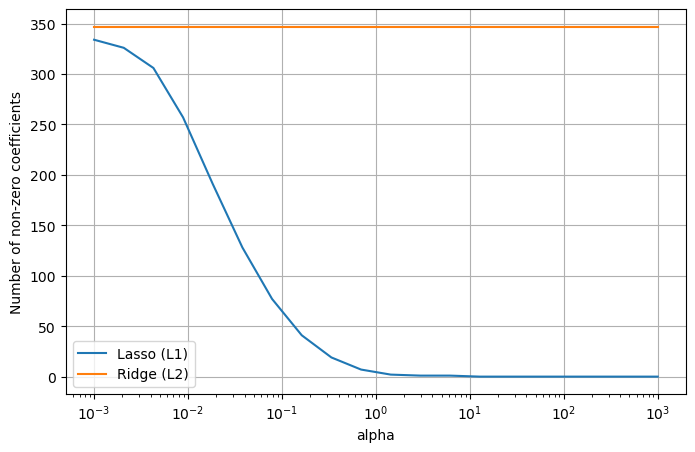

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(alphas, lasso_nonzero_counts, label='Lasso (L1)')
plt.plot(alphas, ridge_nonzero_counts, label='Ridge (L2)')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Number of non-zero coefficients')
plt.legend()
plt.grid(True)
plt.show()


При использовании L1-регуляризации (Lasso) с увеличением коэффициента регуляризации наблюдается резкое уменьшение числа ненулевых коэффициентов, что соответствует ожиданиям и отражает способность Lasso выполнять отбор признаков. В случае L2-регуляризации (Ridge) количество ненулевых коэффициентов практически не меняется при изменении параметра α, поскольку Ridge лишь уменьшает значения коэффициентов, но не обнуляет их. Полученные результаты полностью согласуются с теоретическими свойствами L1- и L2-регуляризации.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


rmse_train = np.sqrt(mean_squared_error(y_train_1000, y_train_pred))
mae_train = mean_absolute_error(y_train_1000, y_train_pred)
r2_train = r2_score(y_train_1000, y_train_pred)



In [100]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)


In [101]:
rmse_train, mae_train, r2_train, rmse_test, mae_test, r2_test


(25.15247370884891,
 14.38500244140625,
 0.403060028224131,
 734140975455.4232,
 158171758567.89758,
 -4.029120705992924e+20)

Test-метрики катастрофические. Несмотря на применение L2-регуляризации, качество модели на контрольной выборке остаётся крайне низким. Это указывает на то, что регуляризация сама по себе не устраняет проблемы, связанные с некорректной предобработкой данных и различиями в пространстве признаков между обучающей и тестовой выборками.

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [103]:
from sklearn.model_selection import KFold

alphas = np.logspace(-3, 3, 20)

cv = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


In [104]:
from sklearn.model_selection import GridSearchCV


ridge = Ridge()

gs_mse = GridSearchCV(
    ridge,
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error',
    cv=cv
)

gs_mse.fit(X_train_1000, y_train_1000)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [105]:
best_alpha_mse = gs_mse.best_params_['alpha']
best_alpha_mse


54.555947811685144

In [106]:
gs_mae = GridSearchCV(
    ridge,
    param_grid={'alpha': alphas},
    scoring='neg_mean_absolute_error',
    cv=cv
)

gs_mae.fit(X_train_1000, y_train_1000)
best_alpha_mae = gs_mae.best_params_['alpha']
best_alpha_mae


54.555947811685144

In [107]:
gs_r2 = GridSearchCV(
    ridge,
    param_grid={'alpha': alphas},
    scoring='r2',
    cv=cv
)

gs_r2.fit(X_train_1000, y_train_1000)
best_alpha_r2 = gs_r2.best_params_['alpha']
best_alpha_r2


54.555947811685144

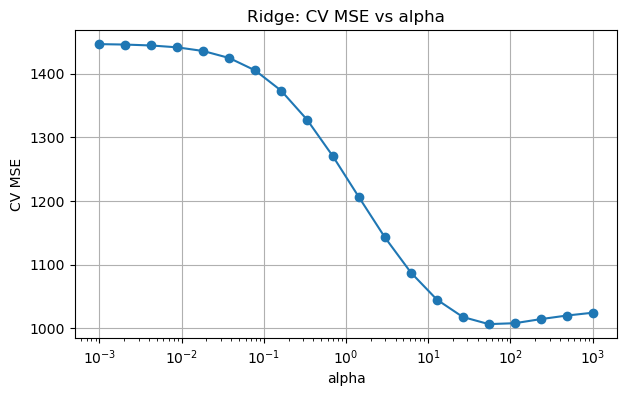

In [108]:
mean_mse = -gs_mse.cv_results_['mean_test_score']

plt.figure(figsize=(7, 4))
plt.plot(alphas, mean_mse, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV MSE')
plt.title('Ridge: CV MSE vs alpha')
plt.grid(True)
plt.show()


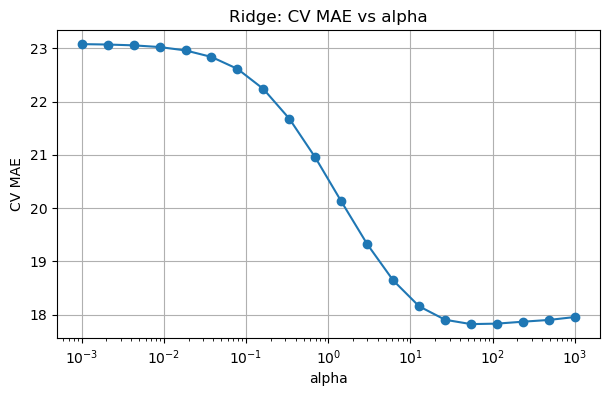

In [109]:
mean_mae = -gs_mae.cv_results_['mean_test_score']

plt.figure(figsize=(7, 4))
plt.plot(alphas, mean_mae, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV MAE')
plt.title('Ridge: CV MAE vs alpha')
plt.grid(True)
plt.show()


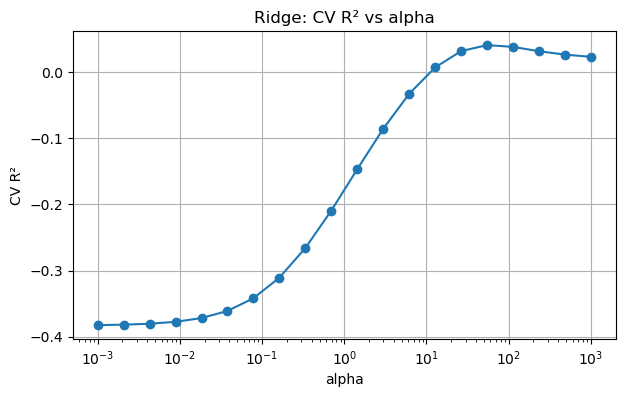

In [110]:
mean_r2 = gs_r2.cv_results_['mean_test_score']

plt.figure(figsize=(7, 4))
plt.plot(alphas, mean_r2, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV R²')
plt.title('Ridge: CV R² vs alpha')
plt.grid(True)
plt.show()


In [111]:
ridge_best = Ridge(alpha=best_alpha_r2)
ridge_best.fit(X_train_1000, y_train_1000)


Ridge(alpha=54.555947811685144)

In [112]:
y_train_pred = ridge_best.predict(X_train_1000)
y_test_pred = ridge_best.predict(X_test)


In [113]:
rmse_train = np.sqrt(mean_squared_error(y_train_1000, y_train_pred))
mae_train = mean_absolute_error(y_train_1000, y_train_pred)
r2_train = r2_score(y_train_1000, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train, mae_train, r2_train, rmse_test, mae_test, r2_test


(29.787051748053816,
 16.868974770358854,
 0.16280949703872338,
 35.506271893284854,
 18.402335138892138,
 0.05754310057225853)

Вот теперь, после подбора коэффициента регуляризации с использованием кросс-валидации, результат гораздо лучше: увеличилась устойчивость Ridge-регрессии.

По сравнению с моделью с параметрами по умолчанию качество на контрольной выборке заметно возросло, а значения ошибок стали сопоставимыми с обучающей выборкой. Несмотря на то, что абсолютные значения метрик остаются относительно низкими, модель демонстрирует адекватное обобщение, что указывает на высокую зашумлённость данных и ограниченную применимость линейной модели для данной задачи.

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [114]:
from sklearn.model_selection import cross_val_predict

ridge_oof = Ridge(alpha=best_alpha_r2)

y_oof_pred = cross_val_predict(
    ridge_oof,
    X_train_1000,
    y_train_1000,
    cv=cv
)


In [115]:
errors = y_oof_pred - y_train_1000
abs_errors = np.abs(errors)


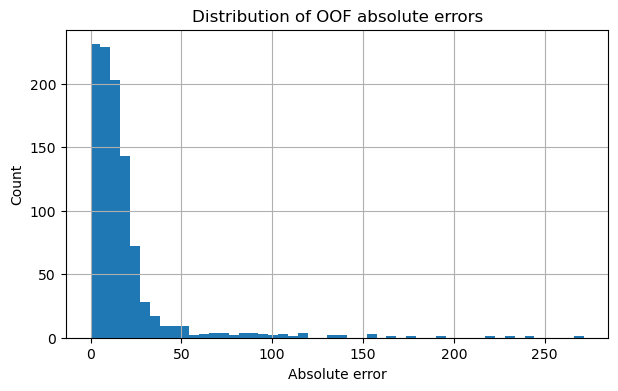

In [116]:
plt.figure(figsize=(7, 4))
plt.hist(abs_errors, bins=50)
plt.xlabel('Absolute error')
plt.ylabel('Count')
plt.title('Distribution of OOF absolute errors')
plt.grid(True)
plt.show()


In [121]:
top_outliers = abs_errors.sort_values(ascending=False).head(25)
top_outliers


36068    271.524818
25337    242.373146
58323    230.257031
44704    218.162552
5609     192.494690
39227    178.268926
31913    168.262156
51191    154.704719
38122    154.507273
39844    153.826070
50686    141.048117
57685    139.608812
5015     135.528717
3959     135.196110
45256    117.756371
47301    117.375367
9044     117.233924
49158    115.748750
54777    109.594204
38154    107.931753
11199    107.883578
67439    105.388848
47158    101.146954
31163    100.494277
21419     96.399757
Name: DepDelay, dtype: float64

Как видно, объекты с очень большими ошибками можно по пальцам сосчитать. В основном у всех малые и умеренные ошибки.

Наибольший вклад в значение ошибки вносят несколько отдельных наблюдений.